# Halftime Shows

Goal of this project is to find out how some of the elements of the Super Bowl show interact with each other. After exploring and cleaning data a little, need to answer questions:

<ul>
<li>What are the most extreme game outcomes?
<li>How does the game affect television viewership?
<li>How have viewership, TV ratings, and ad cost evolved over time?
<li>Who are the most prolific musicians in terms of halftime show performances?
</ul>

### Sources of information:

<p>Game data: <a href=https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions>List of Super Bowl Champions</a><br>
TV data: <a href=https://en.wikipedia.org/wiki/Super_Bowl_television_ratings>Super Bowl television ratings</a><br>
Halftime musitian data: <a href=https://en.wikipedia.org/wiki/List_of_Super_Bowl_halftime_shows>List of Super Bowl halftime shows</a></p>

In [3]:
import pandas as pd

# Load the csv data into DataFrames
games = pd.read_csv('data_files/project_superbowl_halftime_shows/game_data.csv')
tv_rating = pd.read_csv('data_files/project_superbowl_halftime_shows/tv_data.csv')
halftime_musicians = pd.read_csv('data_files/project_superbowl_halftime_shows/halftime_musician_data.csv')

# Display the first 5 rows
display(games.head(5))
display(tv_rating.head(5))
display(halftime_musicians.head(5))

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


In [4]:
# inspect the data
games.info()
print('\n')
tv_rating.info()
print('\n')
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
date              52 non-null object
super_bowl        52 non-null int64
venue             52 non-null object
city              52 non-null object
state             52 non-null object
attendance        52 non-null int64
team_winner       52 non-null object
winning_pts       52 non-null int64
qb_winner_1       52 non-null object
qb_winner_2       2 non-null object
coach_winner      52 non-null object
team_loser        52 non-null object
losing_pts        52 non-null int64
qb_loser_1        52 non-null object
qb_loser_2        3 non-null object
coach_loser       52 non-null object
combined_pts      52 non-null int64
difference_pts    52 non-null int64
dtypes: int64(6), object(12)
memory usage: 7.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
super_bowl          53 non-null int64
network             53 non-null object
avg_us_

### Resolution
<p>For the Games data, there are missing values in the backup quarterback columns:
<ul>
    <li>qb_winner_2
    <li>qb_loser_2
</ul>
<p>For the TV data, the following columns have missing values:
<ul>
    <li>total_us_viewers (The number of viewers who watched at least six minutes of the broadcast.)
    <li>rating_18_49 (average % of U.S. adults 18-49 who live in a household with a TV)
    <li>share_18_49 (average % of U.S. adults 18-49 who live in a household with a TV in use)
</ul>
<p>For the Halftime Musician data, there are missing numbers of songs (num_songs) for about a third of the performances.

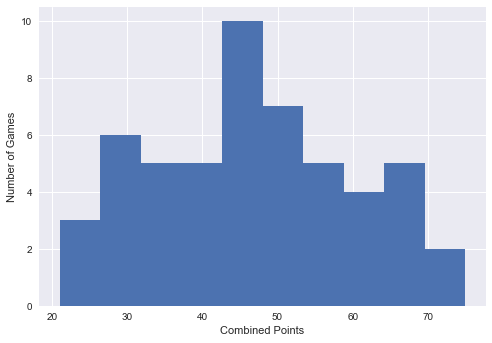

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [5]:
# Plot a histogram of combined points.
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

games['combined_pts'].hist()
plt.xlabel('Combined Points')
plt.ylabel('Number of Games')
plt.show()

# Display the rows with the most extreme combined point outcomes.
display(games[games['combined_pts'] > 70])
display(games[games['combined_pts'] < 25])

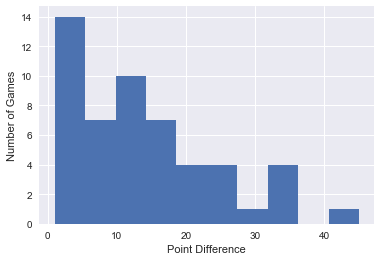

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


In [6]:
# Histogram of point differences
games['difference_pts'].hist()
plt.xlabel('Point Difference')
plt.ylabel('Number of Games')
plt.show()

# Display the closest game and biggest blowouts
display(games[games['difference_pts'] == 1])
display(games[games['difference_pts'] >= 35])

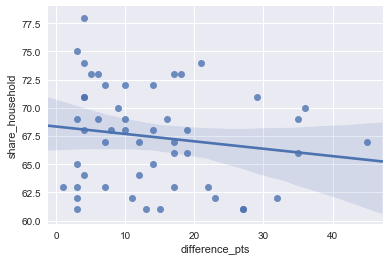

In [7]:
# Find out, is large point differences translates to lost viewers.
# Join Game and TV data, excluding first game (splitted data)
games_tv = pd.merge(tv_rating[tv_rating['super_bowl'] > 1], games, on='super_bowl')

import seaborn as sns

# Scatter plot with linear regression
sns.regplot(x='difference_pts', y='share_household', data=games_tv)

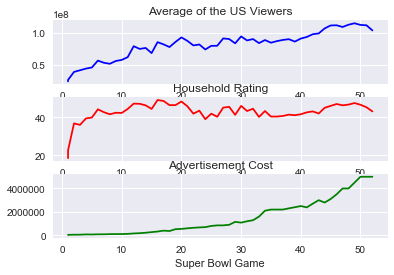

In [8]:
# Viewership and advertisement
plt.subplot(3, 1, 1)
plt.plot(tv_rating['super_bowl'], tv_rating['avg_us_viewers'], color='#0000ff')
plt.title('Average of the US Viewers')

plt.subplot(3, 1, 2)
plt.plot(tv_rating['super_bowl'], tv_rating['rating_household'], color='#ff0000')
plt.title('Household Rating')

plt.subplot(3, 1, 3)
plt.plot(tv_rating['super_bowl'], tv_rating['ad_cost'], color='#008000')
plt.title('Advertisement Cost')

plt.xlabel('Super Bowl Game')
plt.show()

In [9]:
# Fiest show musicians
halftime_musicians[halftime_musicians['super_bowl'] <= 25]

,super_bowl,musician,num_songs
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN
90,23,Elvis Presto,7.0
91,22,Chubby Checker,2.0
92,22,San Diego State University Marching Aztecs,NaN


In [10]:
# Count halftime show appearances for each musician
appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
appearances = appearances.sort_values('super_bowl', ascending=False)
appearances[appearances['super_bowl'] > 1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


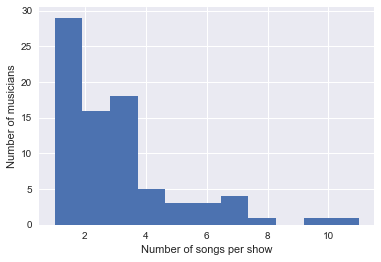

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0


In [11]:
# Find out who has the most number of songs
# Filter out marching bands
no_marching_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_marching_bands = no_marching_bands[~no_marching_bands.musician.str.contains('Spirit')]

max_songs = int(max(no_marching_bands['num_songs'].values))
# Plot histogram
plt.hist(no_marching_bands['num_songs'].dropna(), bins=max_songs)
plt.xlabel('Number of songs per show')
plt.ylabel('Number of musicians')
plt.show()

# Display the top 5
no_marching_bands = no_marching_bands.sort_values('num_songs', ascending=False)
display(no_marching_bands.head(5))